In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
cov = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/aggregate_covid_country.csv")
cov

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [4]:
cov.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [5]:
cov.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

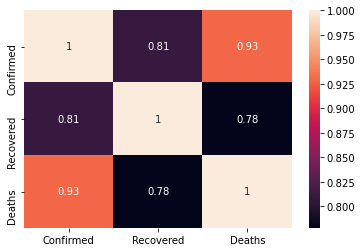

In [6]:
sns.heatmap(cov.corr(),annot=True)

In [7]:
cov.sample()

,Date,Country,Confirmed,Recovered,Deaths
20832,2020-05-11,Singapore,23822,3225,21


In [8]:
date_parsed = pd.to_datetime(cov['Date'])
date_parsed

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
23683   2020-05-26
23684   2020-05-26
23685   2020-05-26
23686   2020-05-26
23687   2020-05-26
Name: Date, Length: 23688, dtype: datetime64[ns]

In [9]:
cov['Day']=date_parsed.dt.day

In [10]:
cov['Year']=date_parsed.dt.year

In [11]:
cov['Month']=date_parsed.dt.month

In [12]:
cov.head()

,Date,Country,Confirmed,Recovered,Deaths,Day,Year,Month
0,2020-01-22,Afghanistan,0,0,0,22,2020,1
1,2020-01-22,Albania,0,0,0,22,2020,1
2,2020-01-22,Algeria,0,0,0,22,2020,1
3,2020-01-22,Andorra,0,0,0,22,2020,1
4,2020-01-22,Angola,0,0,0,22,2020,1


In [13]:
cov['Day'].dtype

dtype('int64')

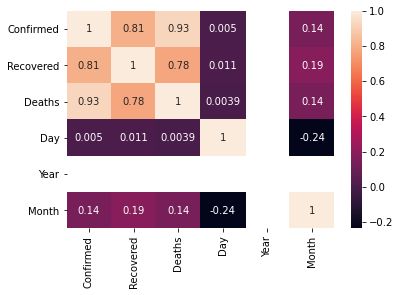

In [14]:
sns.heatmap(cov.corr(),annot=True)

In [15]:
cov['Year'].value_counts()

2020    23688
Name: Year, dtype: int64

In [16]:
cov['Month'].value_counts()

3    5828
4    5640
2    5452
5    4888
1    1880
Name: Month, dtype: int64

In [17]:
# From above Date column is not have much correlation with the death column

In [18]:
cov.drop(['Month','Year','Day','Date'],axis=1,inplace=True)
cov.sample()

,Country,Confirmed,Recovered,Deaths
17046,Nigeria,665,188,22


In [19]:
cov['Country'].is_unique

False

In [20]:
len(cov['Country'].value_counts()) ## Number of Counties in the dataset

188

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
cov['Country']=le.fit_transform(cov['Country'])
cov.head()

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


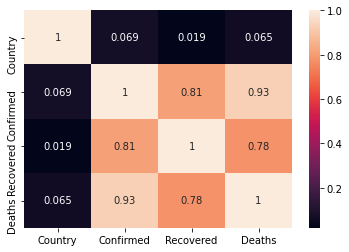

In [24]:
sns.heatmap(cov.corr(),annot=True)

In [25]:
cov.drop('Country',axis=1,inplace=True)

In [26]:
cov.head()

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [27]:
cov.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [28]:
# From above absorvations. All three columns have too much difference between means and 50% percentile median.
# It shows that columns having a Right Skewness 

# Data Visualization

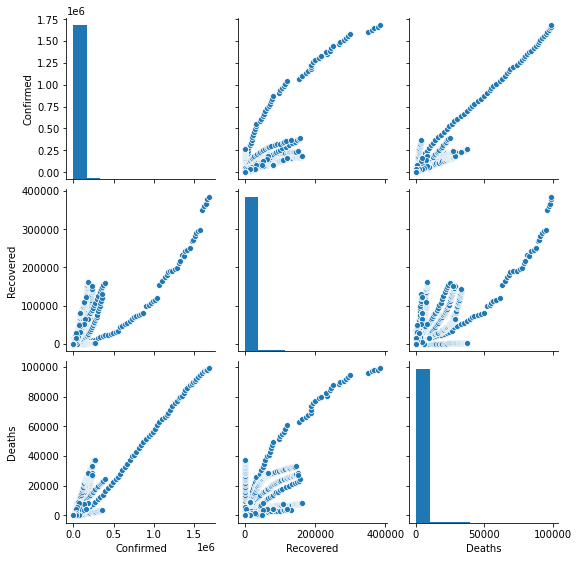

In [29]:
sns.pairplot(cov)

In [30]:
# From above Graph we can see that Confirmed and Recovered Column is Linearly increasing with some outliers

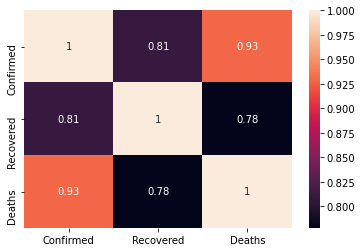

In [31]:
sns.heatmap(cov.corr(),annot=True)

In [32]:
# From heatmap it shows that Death column has high positive correlation with Confirmed and Recovered columsn.

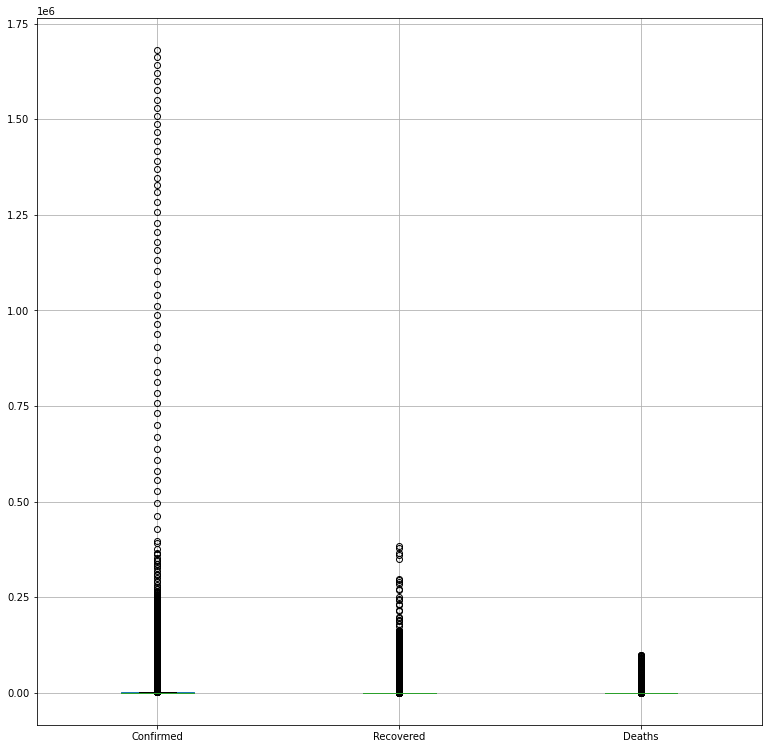

In [33]:
cov.boxplot(figsize=(13,13))

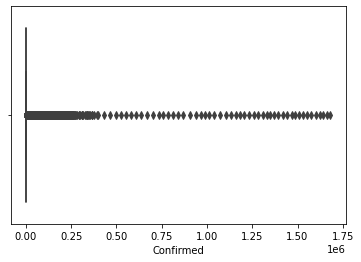

In [34]:
sns.boxplot(cov['Confirmed'])

In [35]:
cov.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [36]:
# High Skewness and with high outliers

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss=StandardScaler()

In [39]:
ss_cov=ss.fit_transform(cov)

In [40]:
cov1=pd.DataFrame(ss_cov,columns=['Confirmed','Recovered','Deaths'])

In [41]:
cov1.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [42]:
# From above observation looks like outliers are ligitimate

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [44]:
X_train, X_test, y_train, y_test = train_test_split(cov.drop('Deaths',axis=1),cov['Deaths'], test_size=0.25, 
                                                    random_state=100)
lr = LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
lr.score(X_train,y_train)
rscrore=r2_score(y_test,pred)
crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()
print(f"Final R2 accuracy is {rscrore*100}\n Cross Validate score is {(crv*100)}\n ")

Final R2 accuracy is 82.40839611926143
 Cross Validate score is 87.39409159484568
 


In [45]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(cov.drop('Deaths',axis=1),cov['Deaths'], test_size=0.25, 
                                                    random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=10).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} \n best random state is{best_state}")

Final accuracy is 91.44946444245227 
 Cross Validate score is 83.46841544193794 
# difference is 7.981049000514332 
 best random state is96


# Pipeline

In [46]:
X_train, X_test, y_train, y_test = train_test_split(cov.drop('Deaths',axis=1),cov['Deaths'], test_size=0.25, 
                                                    random_state=96)

In [47]:

lr = LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
lr.score(X_train,y_train)
rscrore=r2_score(y_test,pred)
crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()
print(f"Final R2 accuracy is {rscrore*100}\n Cross Validate score is {(crv*100)}\n ")

Final R2 accuracy is 91.44946444245227
 Cross Validate score is 84.17992658164437
 


In [48]:
from sklearn.pipeline import Pipeline

In [49]:
parameters_sgd={
 'penalty': ['l1','l2','elasticnet'],
 'alpha': [0.0001,0.001,0.01,0.1,1],
    'max_iter':[1000,2000],
}
parameters_rndf={
 'criterion': ['mse','mae'],
 'max_features': ['auto','sqrt'],
 'n_estimators': list(np.arange(100,150)),
 'random_state': [202],
    'max_depth':[5],
}
parameters_deci_tree={
 'criterion': ['mse','mae'],
#  'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [202]}
parameters_knn_reg={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
    
}
parameters_svr_reg={
    'kernel': ['linear','poly','rbf'],
#     'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_linear_reg = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [50]:
parameter_lis=[parameters_linear_reg,parameters_knn_reg,parameters_svr_reg,parameters_deci_tree,parameters_sgd]
models=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),SGDRegressor()]
models_name=['LinearRegression','KNeighborsRegressor','SVR','DecisionTreeRegressor','SGDRegressor']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='r2'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    r2score=r2_score(y_test,pred)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    print(f"Final accuracy is {r2score*100} \n\nCross Validate score is {(crv*100)}\n\n{gsv[0].best_estimator_}\n\n{gsv[0].best_params_}\n\n=====================================================")
    if r2score>best_score and crv>0:
        best_score=r2score
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")
    

Final accuracy is 91.44936669440655 

Cross Validate score is 84.31807370302768

LinearRegression(fit_intercept=False, normalize=True)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Final accuracy is 96.93359495771729 

Cross Validate score is 96.08129703598995

KNeighborsRegressor(weights='distance')

{'n_neighbors': 5, 'weights': 'distance'}

Final accuracy is -1.6276908278492153 

Cross Validate score is 1.4596819080564538

SVR(max_iter=700)

{'kernel': 'rbf', 'max_iter': 700}

Final accuracy is 94.86868908882074 

Cross Validate score is 91.26136518229744

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=202)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 202}

Final accuracy is -1.2479589671673189e+28 

Cross Validate score is -9.023392267153747e+31

SGDRegressor(alpha=1, max_iter=2000, penalty='l1')

{'alpha': 1, 'max_iter': 2000, 'penalty': 'l1'}

Best model name is :  GridSearchCV(cv=5, estimator=KNeighborsRegres

# Conclusion Best Model is KNeighborsRegressor from all above models

In [51]:
######  criterion{“mse”, “mae”}, default=”mse”
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestRegressor(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=r2_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestRegressor(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print(r2_score(y_test,predictions)*100)
    print((cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [52]:
rndtree(list(np.arange(120,170)),96)

98.59856412771242
97.06266125192755
best n is  164


In [53]:
def rftree(a,b,c):
    mod=RandomForestRegressor(n_estimators=i,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print(r2_score(y_test,pred)*100)
    print((cross_val_score(RandomForestRegressor(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [54]:
rftree(164,96,'mse')

98.59988162710735
97.08800321292175


In [55]:
rftree(164,96,'mae')

98.52844502455365
96.69090483847577


# Conclusion: Best Model is RandomForestRegressor with criterian mse from all above models